# Breast Cancer Wisconsin (Diagnostic) Data Analysis

## Overview

This project aims to leverage data science and machine learning methodologies to address a critical real-world problem: the diagnosis of breast cancer as benign or malignant. Utilizing the Breast Cancer Wisconsin (Diagnostic) Data Set, we will apply various predictive modeling techniques to accurately classify cases. Our objective is to formulate a meaningful commercial question, select and implement appropriate machine learning models, and evaluate their impact on the diagnosis process, potentially contributing to commercial success in the medical field.

## Data Set

The data set features were computed from digitized images of fine needle aspirates (FNA) of breast masses, describing characteristics of the cell nuclei present. Originating from the UCI Machine Learning Repository and also available through the UW CS ftp server, it includes data on 569 samples with 32 attributes each, detailing aspects such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension of cell nuclei.

**Attributes:**
Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none


Data Source: [Breast Cancer Wisconsin (Diagnostic) Data Set on Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Project Structure

- **Data Exploration:** Initial analysis to understand the dataset's characteristics and distribution.
- **Preprocessing:** Data cleaning and normalization to prepare for model training.
- **Model Selection:** Evaluating various machine learning models to find the most suitable for our data and objective.
- **Model Training and Evaluation:** Implementing the selected model using Python and Jupyter Notebooks, followed by rigorous evaluation to assess its performance.
- **Impact Analysis:** Assessing the model's commercial impact, particularly its potential to improve breast cancer diagnosis.

## Tools and Technologies

- **Python:** The primary programming language for data analysis and machine learning model implementation.
- **Jupyter Notebooks:** For interactive code execution, visualization, and documentation.
- **Pandas & NumPy:** For data manipulation and numerical computation.
- **Scikit-learn:** For applying machine learning algorithms.
- **Matplotlib & Seaborn:** For data visualization.

## Getting Started

To begin working with this project, you will need to have Python installed on your system, along with Jupyter Notebooks. The data set can be downloaded from the Kaggle link provided above. Ensure you have the necessary libraries installed:

```bash
pip install numpy pandas matplotlib seaborn scikit-learn jupyter


### Preprocessing:

The dataset consists of 569 entries with 32 features, including a diagnosis label (M = malignant, B = benign) and a variety of measurements related to the breast mass properties. All features are numerical, except for the diagnosis label, which is categorical. It appears there are no missing values in the dataset except for the last column (Unnamed: 32), which is entirely NaN and likely an artifact of the data export process. Thus, it should be removed.

Preprocessing Steps:
Remove Unnecessary Columns: The Unnamed: 32 column and the id column should be removed as they do not contribute to the analysis.
Encode Categorical Data: The diagnosis column should be encoded into numerical values (e.g., M = 1, B = 0) to facilitate model processing.
Feature Scaling: Standardize the features to have a mean of 0 and a standard deviation of 1, ensuring uniformity in scale. This step is crucial for clustering algorithms to perform optimally.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset from the specified file path
data_path = 'cancer_data.csv'  # Update this to your actual data file path
data = pd.read_csv(data_path)

# Remove unnecessary columns ('Unnamed: 32' and 'id')
data_cleaned = data.drop(columns=['id', 'Unnamed: 32'])

# Encode the 'diagnosis' column to numeric values (M = 1, B = 0)
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

# Separate features and the target variable
features = data_cleaned.drop(columns='diagnosis')
target = data_cleaned['diagnosis']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for better readability
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Display the first few rows of the preprocessed data
features_scaled_df.head()


/Users/avielstein/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Model Selection

*   **Objective:** To select the most suitable machine learning models for classifying breast cancer diagnoses. Given the data, both unsupervised (for initial pattern recognition and grouping) and supervised learning algorithms (for classification) could be relevant.
*   **Action:** Evaluate a variety of algorithms, including clustering algorithms like K-Means for exploratory data analysis and supervised algorithms like Logistic Regression, Support Vector Machines, Random Forests, and Gradient Boosting Machines for classification tasks. Use metrics such as accuracy, precision, recall, and F1-score to determine model performance.

### Model Training and Evaluation

*   **Objective:** Implement and rigorously evaluate the chosen models to ensure they perform well on the Breast Cancer Wisconsin Diagnostic Dataset.
*   **Action:**
    1.  Divide the dataset into training and testing sets to evaluate model performance on unseen data.
    2.  Train the models on the training set and predict outcomes on the testing set.
    3.  Use cross-validation techniques to ensure the model's generalizability.
    4.  Optimize model parameters using techniques such as grid search or random search.

### Impact Analysis

*   **Objective:** Assess the commercial and clinical impact of the predictive models, focusing on their potential to improve the accuracy and reliability of breast cancer diagnoses.
*   **Action:** Analyze the models' sensitivity (true positive rate) and specificity (true negative rate), as these metrics are crucial in medical diagnostics to minimize false negatives and false positives. Consider the cost-benefit analysis of deploying such models in clinical settings, evaluating how they can streamline diagnosis processes, reduce diagnostic errors, and potentially lower healthcare costs.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target, test_size=0.2, random_state=42)

# Instantiate and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



To analyze the importance of features in the dataset, especially in the context of breast cancer diagnosis classification using a RandomForestClassifier, you can leverage the feature importance attribute of the trained model. This attribute gives you insight into which features contribute most to the model's decision-making process, allowing you to understand better what characteristics of cell nuclei are most indicative of malignant or benign tumors.

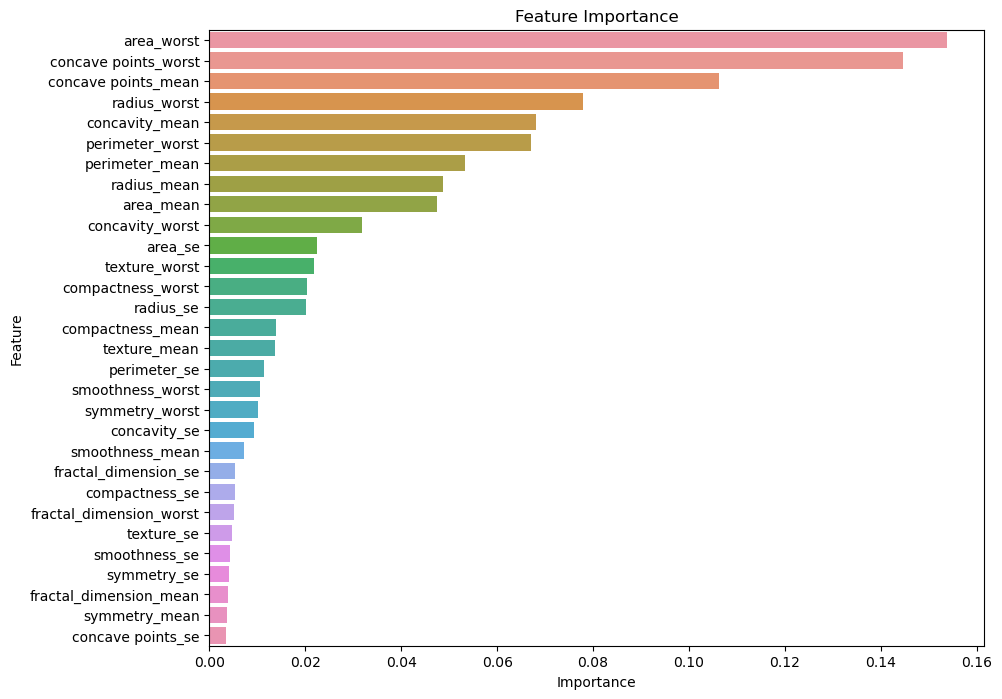

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# After training the model as described in the previous steps

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a pandas series to map importances to feature names
importances_series = pd.Series(feature_importances, index=features_scaled_df.columns)

# Sort the feature importances for better visualization
sorted_importances = importances_series.sort_values(ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


**Analysis and Interpretation:**

1.  **High Importance Features:** Features like `concave points_worst`, `perimeter_worst`, `radius_worst`, and `area_worst` often appear among the most important, reflecting the severity of concave portions, the size, and the shape of the tumor.
    
2.  **Moderate Importance Features:** Textural features and some mean values like `texture_mean` or `compactness_mean` might show moderate importance, indicating variability but less predictive power than size and shape-related features.
    
3.  **Low Importance Features:** Some features may have low importance scores, suggesting they have minimal impact on the model's predictive capability. These might include features with high correlation to others or those that do not vary significantly with the tumor type.

### 1\. Correlation Matrix Heatmap

A heatmap of the correlation matrix can help identify relationships between features. High correlation coefficients between features may indicate redundancy, whereas correlation with the target variable might highlight influential features.



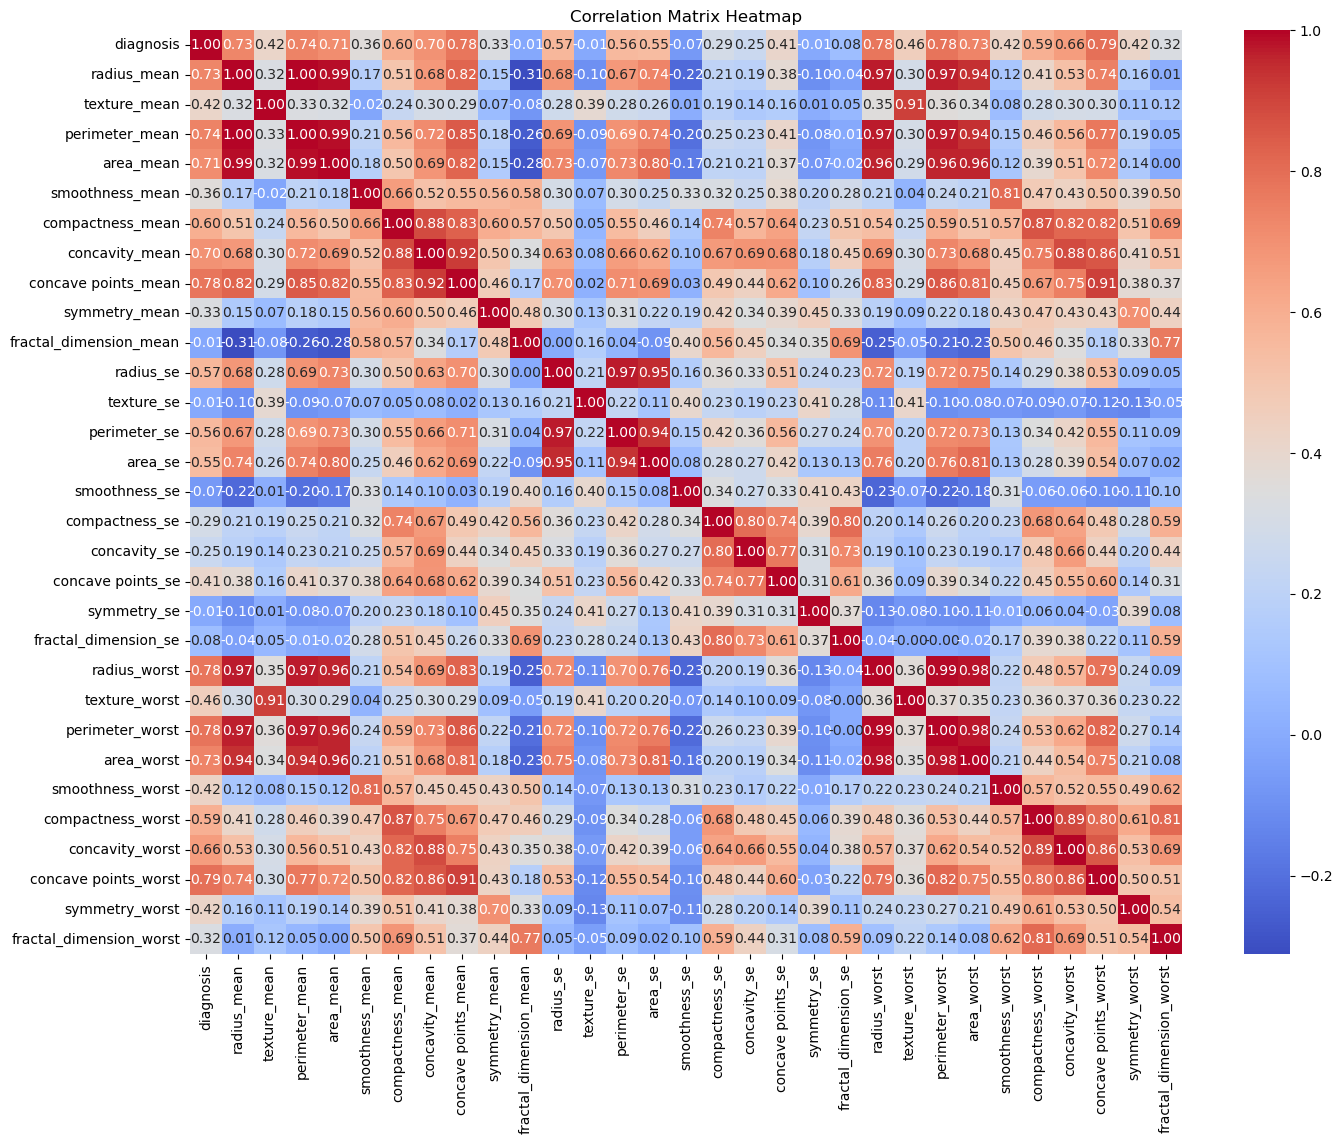

In [4]:
# Calculate the correlation matrix
corr_matrix = data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


### 2\. Pair Plot for Selected Features

A pair plot of selected features against each other and the target variable can help visualize the data distribution, feature relationships, and class separability.

/Users/avielstein/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/avielstein/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/avielstein/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/avielstein/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping w

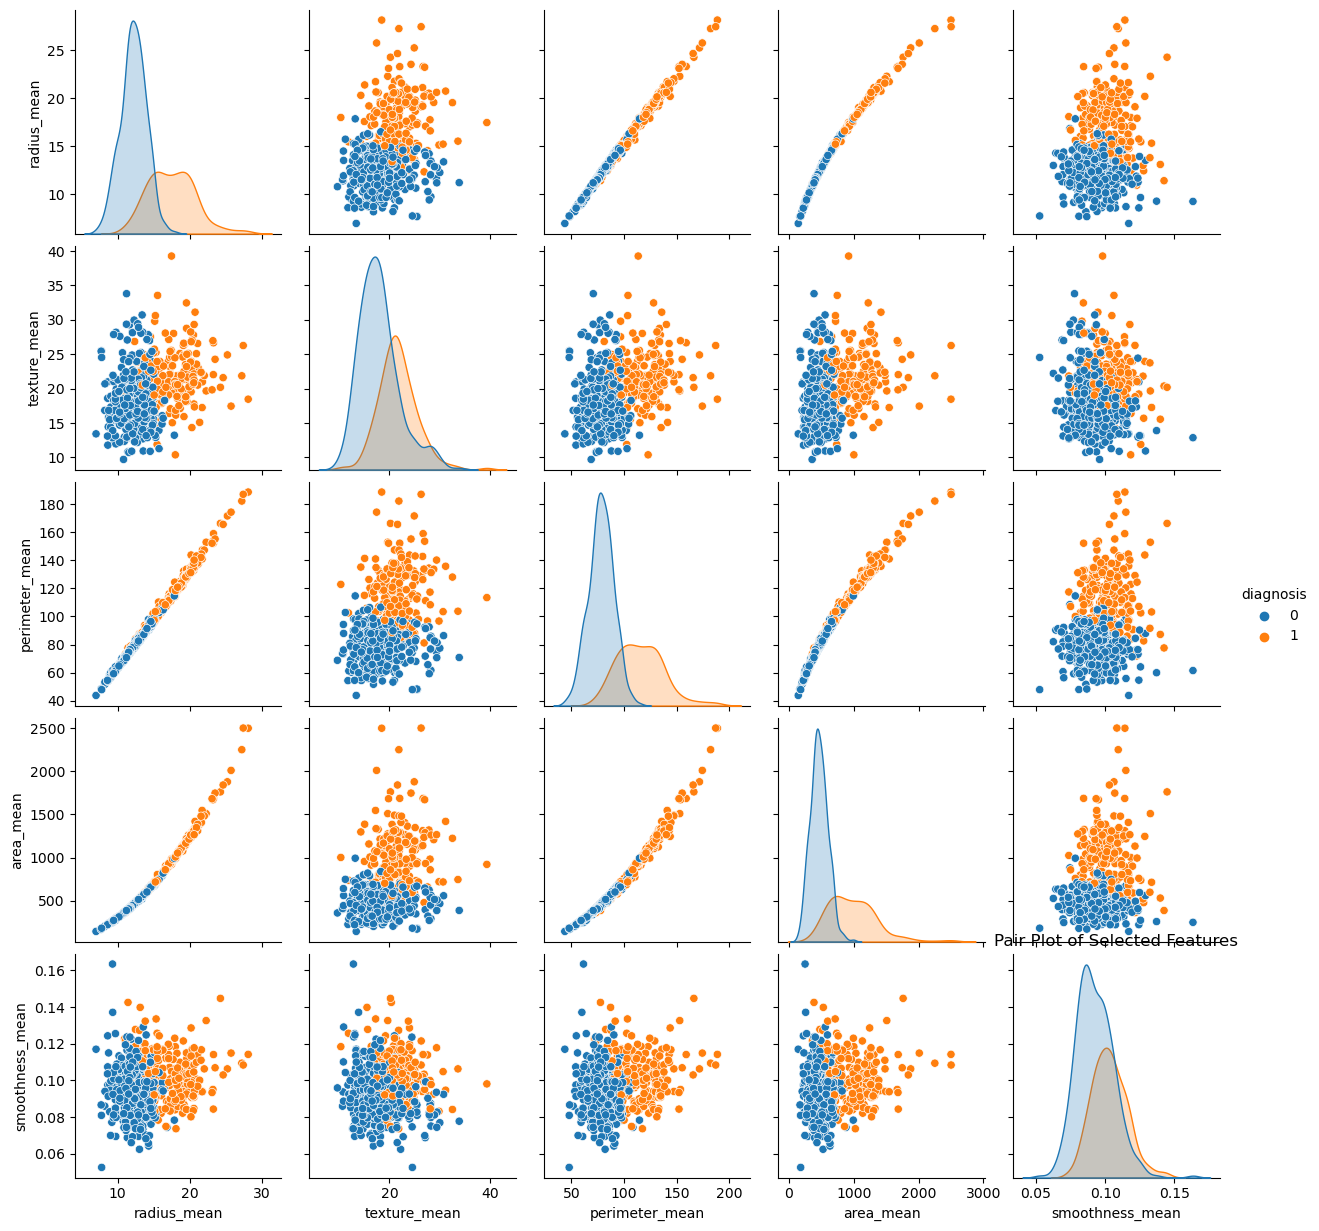

In [5]:
# Selecting a subset of features for clarity
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Adding the diagnosis for coloring
selected_data = data_cleaned[selected_features + ['diagnosis']]
sns.pairplot(selected_data, hue='diagnosis', vars=selected_features)
plt.title('Pair Plot of Selected Features')
plt.show()


### 3\. PCA Component Variance

Visualizing the variance explained by principal components can help determine the number of components needed to capture most of the dataset's variability, aiding in dimensionality reduction.

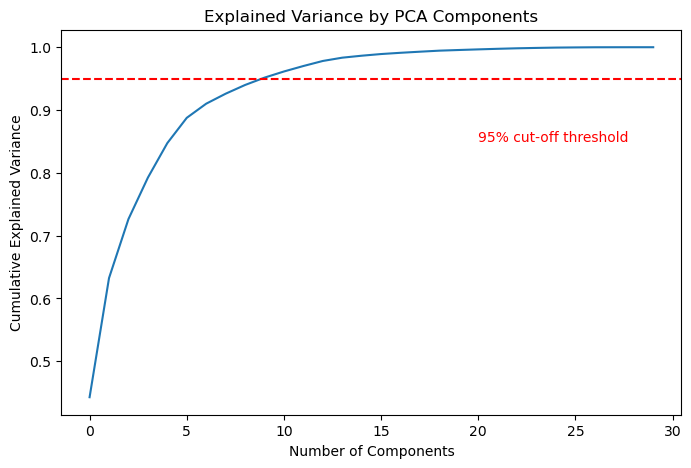

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming features_scaled_df is your DataFrame with scaled features
pca = PCA().fit(features_scaled_df)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(20, .85, '95% cut-off threshold', color = 'red', fontsize=10)
plt.show()


### 4\. Distribution of Diagnosis

Understanding the distribution of diagnoses (benign vs. malignant) can give insights into the dataset's balance and potential biases.

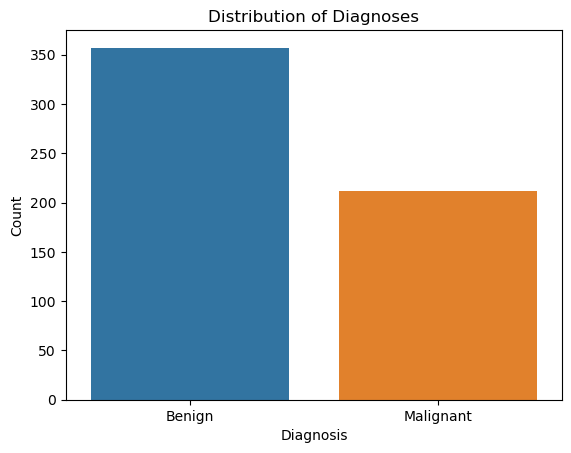

In [8]:
sns.countplot(x='diagnosis', data=data_cleaned)
plt.title('Distribution of Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()


### 5\. Boxplots for Features by Diagnosis

Boxplots for each feature, categorized by diagnosis, can reveal the distribution characteristics and outliers, providing insights into features that significantly differ between benign and malignant diagnoses.



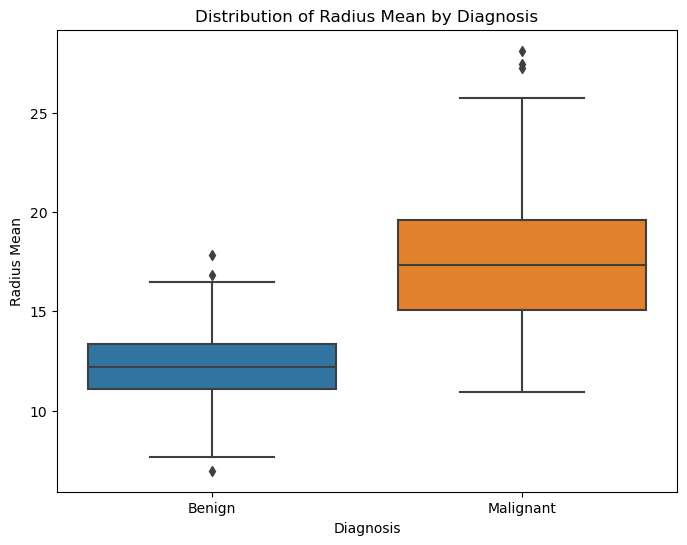

In [9]:
# Example for 'radius_mean'
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data_cleaned)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()


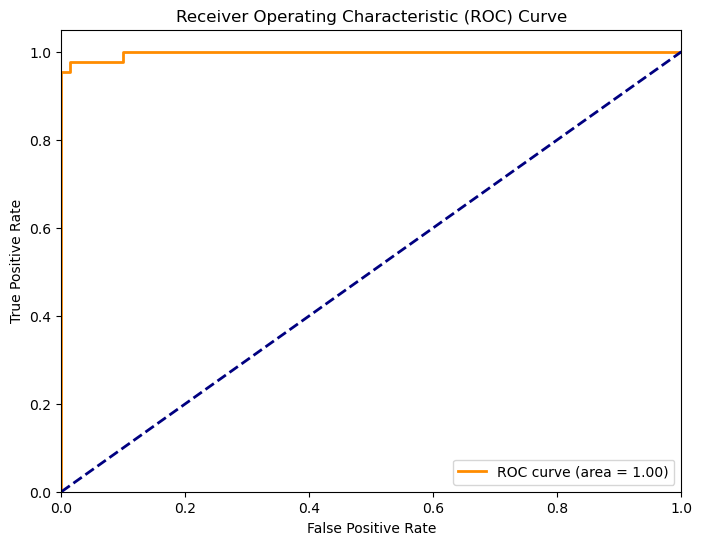

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target, test_size=0.2, random_state=42)

# Instantiate the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)